# Facial Expression Recognition using CNN

Problem Statement

The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. 
The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories 
(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).

Dataset Description:

Total Images: The dataset consists of 28,709 examples
    
Fer2013.csv contains two columns, "emotion" and "pixels". The "emotion" column contains a numeric code ranging from 0 to 6, inclusive, for the emotion that is present in the image. The "pixels" column contains a string surrounded in quotes for each image.
Classes: 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral



Tasks performed: 

As a part of this work I performed the following tasks:

a) Prepared a detailed python notebook using convolutional neural network for classifing the images from Fer.csv

b) Reshape the data:

     • Splitted pixels by space to get columns

     • reshape the input image (48, 48 ,1)

     • changed the type of data to float32

c) Normalize & Train_Test Split:

    • Normalized the data by dividing with 255

    • Splitted the data into train and test (90,10)

d) Model building

e) Evaluating the performance of model using plots and displaying the predicted emotions againt the images

# Required libraries

In [160]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten,Activation,BatchNormalization
from tensorflow.keras.models import Model
import tensorflow.keras.backend as bk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# About the data & activities performed on pixel column

1) dataframe contains the facial expression image pixel values in pixels column & its emotions in emotion column

2) the pixels column values are of string datatype
 
3) following operations are performed on pixels column to make

a) string datatype to numeric

b) shaping the pixel values into array of size (48,48,1)

c) reshaping the array(48,48,1) into the 4D tensor format for providing it as CNN input (which takes 4D tensor as input)

4D format --> (no. of records, img width, img height, channel) 

In [ ]:
df=pd.read_csv('fer2013.csv')
df.head()

In [162]:
df.shape

(35887, 3)

Classes: 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral

In [109]:
Classes=['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']

In [110]:
img_height,img_width=48,48

In [111]:
df['pixels']

0        70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        151 150 147 155 148 133 111 140 170 174 182 15...
2        231 212 156 164 174 138 161 173 182 200 106 38...
3        24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
                               ...                        
35882    50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883    178 174 172 173 181 188 191 194 196 199 200 20...
35884    17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885    30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...
35886    19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...
Name: pixels, Length: 35887, dtype: object

In [112]:
len(df)

35887

# data transformation of pixels

In [113]:
df['pixels']=df['pixels'].apply(lambda pixel_seq:[int(pixel) for pixel in pixel_seq.split()])

In [114]:
l=[]

df['pixels'].apply(lambda values:l.append(values))

0        None
1        None
2        None
3        None
4        None
         ... 
35882    None
35883    None
35884    None
35885    None
35886    None
Name: pixels, Length: 35887, dtype: object

In [115]:
l=np.array(l)

In [116]:
data=l.reshape(35887,48,48,1)
data

array([[[[ 70],
         [ 80],
         [ 82],
         ...,
         [ 52],
         [ 43],
         [ 41]],

        [[ 65],
         [ 61],
         [ 58],
         ...,
         [ 56],
         [ 52],
         [ 44]],

        [[ 50],
         [ 43],
         [ 54],
         ...,
         [ 49],
         [ 56],
         [ 47]],

        ...,

        [[ 91],
         [ 65],
         [ 42],
         ...,
         [ 72],
         [ 56],
         [ 43]],

        [[ 77],
         [ 82],
         [ 79],
         ...,
         [105],
         [ 70],
         [ 46]],

        [[ 77],
         [ 72],
         [ 84],
         ...,
         [106],
         [109],
         [ 82]]],


       [[[151],
         [150],
         [147],
         ...,
         [129],
         [140],
         [120]],

        [[151],
         [149],
         [149],
         ...,
         [122],
         [141],
         [137]],

        [[151],
         [151],
         [156],
         ...,
         [109],
         [

reshaped to 4D tensor format

In [117]:
data.shape

(35887, 48, 48, 1)

# displaying the images & its emotions based on the pixels column 

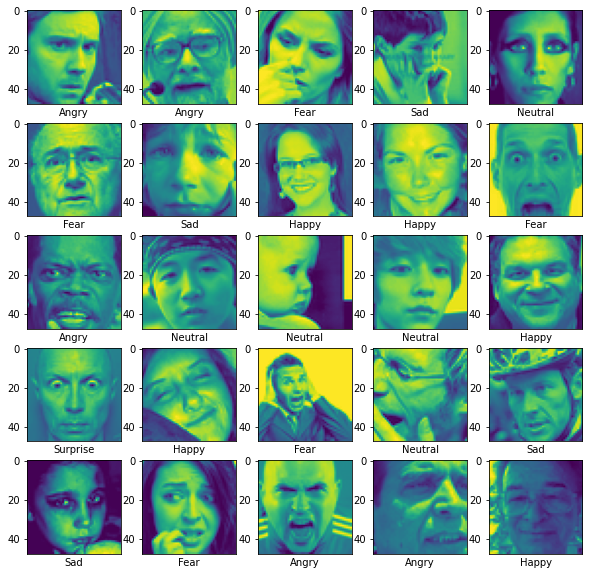

In [119]:
plt.figure(figsize=(10,10))
for i in range(25):    
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.imshow(data[i])
    plt.xlabel(Classes[df['emotion'][i]])

# Arranging of Labels (i.e emotion category of dataframe) in proper format before building the model

In [120]:
labels=df['emotion']
labels

0        0
1        0
2        2
3        4
4        6
        ..
35882    6
35883    3
35884    0
35885    3
35886    2
Name: emotion, Length: 35887, dtype: int64

labels should be in array format..so here we are converting to array

In [121]:
data_labels=labels.to_numpy()
data_labels

array([0, 0, 2, ..., 0, 3, 2], dtype=int64)

# Normalizing the data

In [122]:
data.astype('float32')

array([[[[ 70.],
         [ 80.],
         [ 82.],
         ...,
         [ 52.],
         [ 43.],
         [ 41.]],

        [[ 65.],
         [ 61.],
         [ 58.],
         ...,
         [ 56.],
         [ 52.],
         [ 44.]],

        [[ 50.],
         [ 43.],
         [ 54.],
         ...,
         [ 49.],
         [ 56.],
         [ 47.]],

        ...,

        [[ 91.],
         [ 65.],
         [ 42.],
         ...,
         [ 72.],
         [ 56.],
         [ 43.]],

        [[ 77.],
         [ 82.],
         [ 79.],
         ...,
         [105.],
         [ 70.],
         [ 46.]],

        [[ 77.],
         [ 72.],
         [ 84.],
         ...,
         [106.],
         [109.],
         [ 82.]]],


       [[[151.],
         [150.],
         [147.],
         ...,
         [129.],
         [140.],
         [120.]],

        [[151.],
         [149.],
         [149.],
         ...,
         [122.],
         [141.],
         [137.]],

        [[151.],
         [151.],
      

normalizing the data

In [123]:
data=data/255
data

array([[[[0.2745098 ],
         [0.31372549],
         [0.32156863],
         ...,
         [0.20392157],
         [0.16862745],
         [0.16078431]],

        [[0.25490196],
         [0.23921569],
         [0.22745098],
         ...,
         [0.21960784],
         [0.20392157],
         [0.17254902]],

        [[0.19607843],
         [0.16862745],
         [0.21176471],
         ...,
         [0.19215686],
         [0.21960784],
         [0.18431373]],

        ...,

        [[0.35686275],
         [0.25490196],
         [0.16470588],
         ...,
         [0.28235294],
         [0.21960784],
         [0.16862745]],

        [[0.30196078],
         [0.32156863],
         [0.30980392],
         ...,
         [0.41176471],
         [0.2745098 ],
         [0.18039216]],

        [[0.30196078],
         [0.28235294],
         [0.32941176],
         ...,
         [0.41568627],
         [0.42745098],
         [0.32156863]]],


       [[[0.59215686],
         [0.58823529],
         [0.57

# train test split

In [124]:
train_data,test_data,train_label,test_label=train_test_split(data,data_labels,train_size=0.9,random_state=42)

In [125]:
train_data.shape

(32298, 48, 48, 1)

In [126]:
test_data.shape

(3589, 48, 48, 1)

In [127]:
train_label.shape

(32298,)

In [128]:
test_label.shape

(3589,)

In [129]:
df['emotion'].unique()

array([0, 2, 4, 6, 3, 5, 1], dtype=int64)

one hot encoder for output labels

In [130]:
train_label=keras.utils.to_categorical(train_label,num_classes=7)
test_label=keras.utils.to_categorical(test_label,num_classes=7)

In [131]:
train_label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [132]:
bk.image_data_format()

'channels_last'

# Model building

In [135]:
model=Sequential()

# layer1
model.add(Conv2D(filters=64,kernel_size=(5,5),activation='relu',input_shape=(48,48,1),data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# layer2
model.add(Conv2D(filters=128,kernel_size=(5,5),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# layer3
model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# fully connected dense layer
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(7,activation='softmax'))

In [136]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 44, 44, 64)        1664      
_________________________________________________________________
batch_normalization_25 (Batc (None, 44, 44, 64)        256       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 18, 18, 128)       204928    
_________________________________________________________________
batch_normalization_26 (Batc (None, 18, 18, 128)       512       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 9, 9, 128)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 256)        

In [137]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics='accuracy')

In [138]:
train_data.shape

(32298, 48, 48, 1)

Model configuration

In [139]:
model.get_config()

{'name': 'sequential_7',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 48, 48, 1),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'conv2d_19_input'}},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d_19',
    'trainable': True,
    'batch_input_shape': (None, 48, 48, 1),
    'dtype': 'float32',
    'filters': 64,
    'kernel_size': (5, 5),
    'strides': (1, 1),
    'padding': 'valid',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'BatchNormalization',
   'config': {'name': 'batch_normalization_25',
    'tr

In [140]:
training=model.fit(train_data,train_label,epochs=30,validation_split=0.2)

Epoch 1/30
808/808 [==============================] - 141s 173ms/step - loss: 1.9823 - accuracy: 0.2801 - val_loss: 1.6973 - val_accuracy: 0.2893
Epoch 2/30
808/808 [==============================] - 933s 1s/step - loss: 1.4554 - accuracy: 0.4468 - val_loss: 1.5169 - val_accuracy: 0.4223
Epoch 3/30
808/808 [==============================] - 133s 164ms/step - loss: 1.2645 - accuracy: 0.5190 - val_loss: 1.4066 - val_accuracy: 0.4559
Epoch 4/30
808/808 [==============================] - 125s 155ms/step - loss: 1.1420 - accuracy: 0.5693 - val_loss: 1.3227 - val_accuracy: 0.5074
Epoch 5/30
808/808 [==============================] - 127s 157ms/step - loss: 1.0311 - accuracy: 0.6144 - val_loss: 1.2233 - val_accuracy: 0.5508
Epoch 6/30
808/808 [==============================] - 128s 158ms/step - loss: 0.9332 - accuracy: 0.6490 - val_loss: 1.4457 - val_accuracy: 0.4915
Epoch 7/30
808/808 [==============================] - 129s 159ms/step - loss: 0.7960 - accuracy: 0.7074 - val_loss: 1.2818 - va

In [142]:
training.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# plot of model accuracy & loss

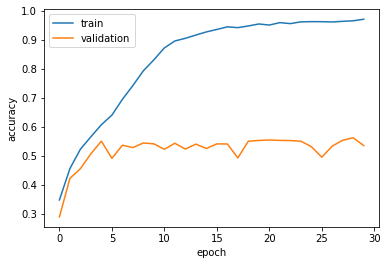

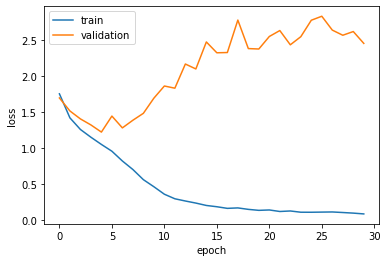

In [146]:
plt.plot(training.history['accuracy'],label='train')
plt.plot(training.history['val_accuracy'],label='validation')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.plot(training.history['loss'],label='train')
plt.plot(training.history['val_loss'],label='validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [143]:
pred=model.predict(test_data)
pred

array([[5.9964537e-04, 1.0870997e-06, 9.1168791e-01, ..., 6.4206123e-02,
        1.0460230e-04, 1.2359275e-04],
       [1.2807370e-09, 1.5149855e-10, 3.1700478e-09, ..., 1.7863151e-10,
        2.0465807e-09, 9.2819775e-08],
       [9.4807130e-01, 4.5001241e-07, 4.8729090e-04, ..., 4.9573038e-02,
        1.0072065e-05, 1.8578086e-03],
       ...,
       [1.0181674e-05, 8.0201463e-09, 2.5241028e-03, ..., 1.2937617e-05,
        9.9739659e-01, 5.6141500e-05],
       [1.5754730e-06, 3.5615182e-07, 3.1602303e-03, ..., 8.3503199e-01,
        2.5201294e-07, 1.5881138e-01],
       [2.3260850e-07, 2.4985493e-07, 2.5817391e-07, ..., 5.9849086e-08,
        2.6254284e-07, 5.0864619e-06]], dtype=float32)

In [176]:
Classes[np.argmax(pred[0])]

'Fear'

# 1) verifying the prediction w.r.t actual

# 2) predicted & actual emotions are labeled in y-axis & x-axis against each test image

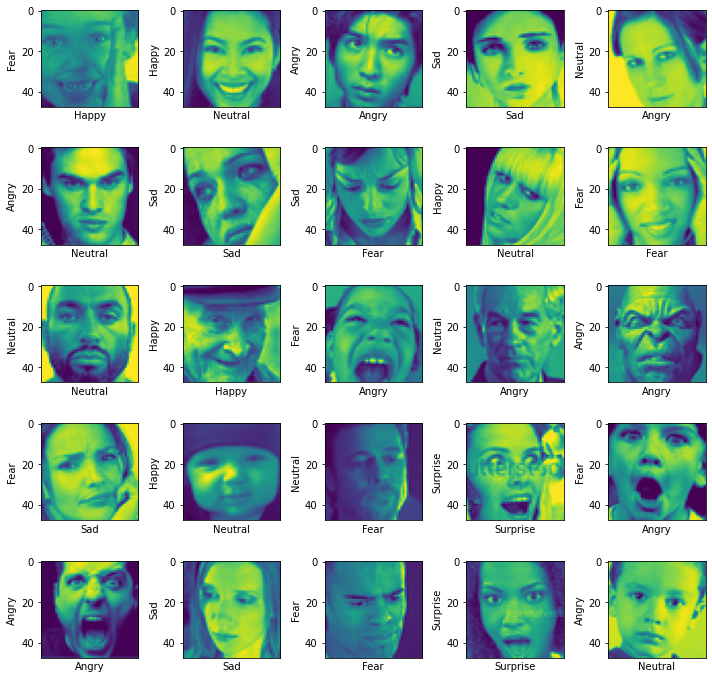

In [179]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.imshow(test_data[i])
    plt.xlabel(Classes[np.argmax(test_label[i])])
    plt.ylabel(Classes[np.argmax(pred[i])])
    plt.tight_layout()

# conclusion:

1) With the above model, we can predict the emotions of image.

2) Above model developed with some CNN layers and dense layers. We can improve it by 

        a) adding more no. of neurons in dense layers
   
        b) adding more hidden layers in dense & CNN
  
        c) adding more filters in CNN
  
        d) changing the learning rate
  
        e) adding dropout layers & batch normalization
  
        f) chaging the optimisers and activation functions